In [72]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import ceil


# Purpose
This Notebook is meant as a check of the VA's response to our questions, particularly about hiring.


Here is the response:

"Choice Act funding **did increase staffing**.  Choice Act funding **increased the rate of hiring** in VHA and **resulted in a 6.3% net increase of more than 18,800 additional onboard staff**. During the 17 months of the Choice Act hiring initiative **(August 1, 2014 – December 31, 2015)**, VHA **hired 56,965 employees**, of which **11,287 (20%) were hired using Choice Act funding**.  The total hires in this time frame represented a **13% increase over the level of hiring in the previous 17-month period** (March 2013-July 2014)."

## Did Choice Act Funding Increase Staffing/rate of hiring?

It's important to note that I can't check rate of hiring. What I can check is the increase in staffing. 

It's possible that hiring increased, but actual staffing levels/staffing increases did not due to increased loss or failure during the onboarding process (this could really add some relevance to Patricia's story). 

So let's actually check: was there an increase in staffing levels? 

I can only look at May 2014 to May 2016 due to the limits of the data. I'm also looking at onboard VHA employees. Since we appear to be losing people during the onboarding process, this is a really important distinction and could explain some discrepencies between VA claims and our findings.

In [73]:
# I'm only looking at the first column since that's the level for all of the VHA (I checkec MAY-FY16 and it all the other columns did add up to the VHA amount)
# I'm also dropping organization (we're only looking at VHA so we don't need to identify that) and ID isn't needed either.
Onboard = pd.read_csv("../Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)
Onboard.head()

,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,268699,272538.0,283338,294444,307430,318560


### Was there an increase between MAY-FY14 and MAY-FY16

In [74]:
Difference = Onboard["MAY-FY16"].item() - Onboard["MAY-FY14"].item()
print "Staffing levels increased by {} onboard employees between May 2014 and May 2016.".format(Difference)

Staffing levels increased by 24116 onboard employees between May 2014 and May 2016.


So there was an increase. But previous years saw an increase too. And the VA said they hired 59,965 (during a window of time contained within May 2014 and May 2016). I only have an additionaly 24,116 onboard. Less than half during a longer hiring period.

Again, they could have hired a bunch of employees and failed to get them though the onboarding process. That is one explanation. 

She does say that there was a net increase of 6.3% and more than 18,800 additional onboard staff. While that is less than 24,116, it would make sense considering the time window.

What happens when we plot staffing levels by year?

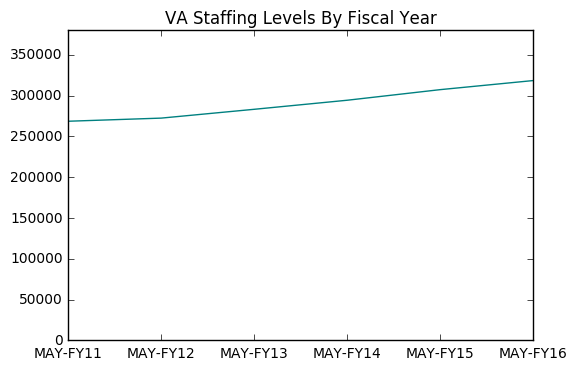

In [75]:
ax = Onboard.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()

We're not seeing a significant increase over that time. The slope looks similar to previous years, actually. Let's see how much it actually increased, looking at two year periods. 

In [76]:
percent_increase_dict = {}


percent_increase_dict["11-13"] = ((Onboard["MAY-FY13"] -Onboard["MAY-FY11"])/Onboard["MAY-FY11"])*100
percent_increase_dict["12-14"] = ((Onboard["MAY-FY14"] -Onboard["MAY-FY12"])/Onboard["MAY-FY12"])*100
percent_increase_dict["13-15"] = ((Onboard["MAY-FY15"] -Onboard["MAY-FY13"])/Onboard["MAY-FY13"])*100
percent_increase_dict["14-16"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"])/Onboard["MAY-FY14"])*100

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase

,11-13,12-14,13-15,14-16
0,5.448104,8.037778,8.502919,8.190352


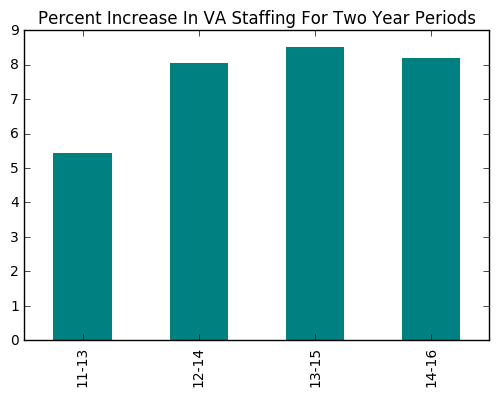

In [77]:
ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

There is an increase in hiring (8.19 percent) from 2014 to 2016, which would make sense with the VA's 6.3 percent claim. 

However, this increase is barely larger than increases in previous years. 

In [78]:
percentage_points = percent_increase_dict["14-16"].item() - percent_increase_dict["12-14"].item()
print "This is only {} percentage points more than 2012 to 2014.".format(round(percentage_points,2))

This is only 0.15 percentage points more than 2012 to 2014.


### So was there an increase in staffing from 2014 to 2016?

Yes, but barely. 


What happens when we remove choice acts from this list?

Disclaimer - I have choice hires as of 9/15/16, a full four months after my May 2016 staffing numbers. The exact number here should not be used, but subtracting these choice hires from onboard staffing will give us some idea as to how many were choice hires (VA said there were 11,287 hires before May 2016 so there isn't much of a difference). 

In [79]:
choice_hires = pd.read_csv("../Data/Hiring/Hiring_Clean_All_Positions.csv")
choice_hires_total = choice_hires["NbrEmps"].sum()
MAY_FY16_no_choice_hires = Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item() - choice_hires_total.item()
#percent_increase_dict["14-16 No Choice Hires"] = ((MAY_FY16_no_choice_hires - Onboard["MAY-FY14"].item())/Onboard["MAY-FY14"].item())
"There were {} choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we"\
" see about {} onboard employees hired around this period were not choice hires.".format(choice_hires_total,MAY_FY16_no_choice_hires)

'There were 12308 choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we see about 11808 onboard employees hired around this period were not choice hires.'

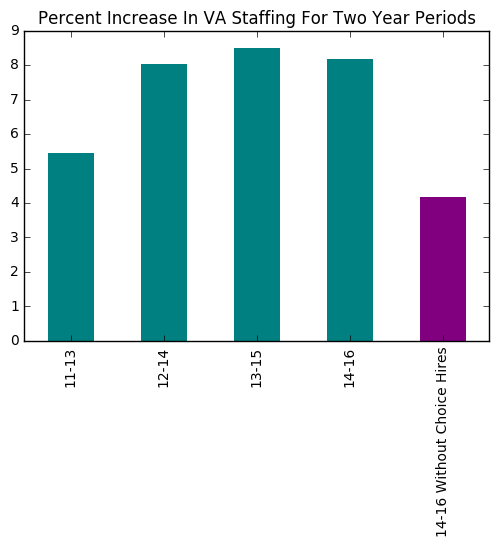

In [80]:
percent_increase_dict["14-16 Without Choice Hires"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"]-MAY_FY16_no_choice_hires)/Onboard["MAY-FY14"])*100





percent_increase = pd.DataFrame.from_dict(percent_increase_dict)

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

What we should be seeing is that the purple bar (2014-2016 without choice hires) is at a similar height to 2012-2014 or even 2011-2013. Instead, the increase we saw in previous years without choice hires is significantly smaller. 

## Instead of adding a signifcant addition to the VA's usual staffing levels, the choice hire were used in lieu of the usual staffing increases. 

### So how much did staffing increases, well, increase?


In [115]:
Increase_2014_2016 = Onboard["MAY-FY16"].item() - Onboard["MAY-FY14"].item()
Increase_2012_2014 = Onboard["MAY-FY14"].item() - Onboard["MAY-FY12"].item()

Increase = round(((Increase_2014_2016 - Increase_2012_2014)/Increase_2012_2014)*100,2)

print "Staffing increased by {} employees from 2012 to 2014"\
" and by {} from 2014 to 2016."\
" This represent a {} percent increase in the increase in staffing.".format(Increase_2012_2014,Increase_2014_2016,Increase)


Staffing increased by 21906.0 employees from 2012 to 2014 and by 24116 from 2014 to 2016. This represent a 10.09 percent increase in the increase in staffing.


10 percent isn't bad, what's important to note is that this is an increase of an increase. Another way to look at is is only a .15 percentage point difference. 

# Let's go through the VHA's claims again, one by one.

### "Funding did increase staffing"

Certainly possible. We don't have hiring numbers. If this is true, a lot of people being hired are not making it through the onboarding process.

### "6.3 percent net increase of more than 18,800 additional onboard staff."

I don't have the exact same time from for this, but the numbers make sense with what I'm seeing, with May 2014 to 2016 seeing a 8.19 percent increase in onboard staff (24,116) . However, May 2012 to 2014 saw an increase of 8.04 percent (21,906). The increase does not seem very significant or impressive when put in that context. 

### "During the 17 months of the Choice Act hiring initiative (August 1, 2014 – December 31, 2015), VHA hired 56,965 employees"

Again, can't verify hiring numbers.

### "11,287 (20%) were hired using Choice Act funding."

This is interesting because this is very similar to the numbers I'm seeing for choice hires (12,308). Yet Choice hires make up way more than 20 percent of the onboard staff, from what I can tell. And while choice hires have increased in numbers of actual onboard staffing since then, we're not seeing general hiring numbers anywhere close to 59,965 (only 24,116 increase in onboard between May 2014 and May 2016.

### "The total hires in this time frame represented a 13% increase over the level of hiring in the previous 17-month period (March 2013-July 2014)."

Once again, I can't look at hires and I have a different time frame. But we do see a 10 percent increase in the increase in staffing in 2014 to 2016 compared to 2012 to 2014. It's the percent of a percent increase so 10 percent seems like a bigger number than it actually represents. A .15 percentage point difference between the two time frames is another way to look at it.

## Here's one final graph looking at just the raw staffing numbers to give an idea of how little staffing has actually increased.

(It's the same as the line graph on the top of the page, just using bars instead).

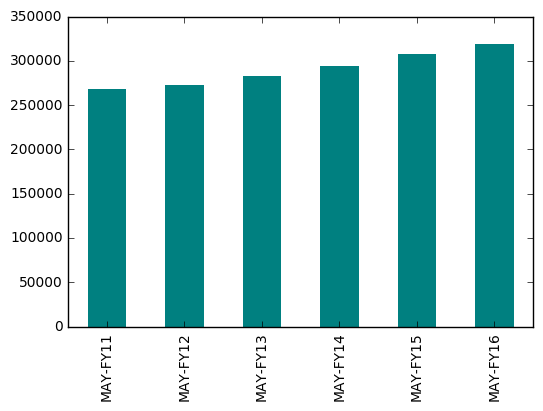

In [123]:
ax = Onboard.transpose().plot(kind="bar",color = 'teal', edgecolor="none")
ax.legend_.remove()